# Import Libraries

In [196]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [198]:
img = cv2.imread(r'E:\Dataset\Alzheimers Dataset ( 4 class of Images)\VeryMildDemented\verymildDem219.jpg')
rows, cols = img.shape[:2]

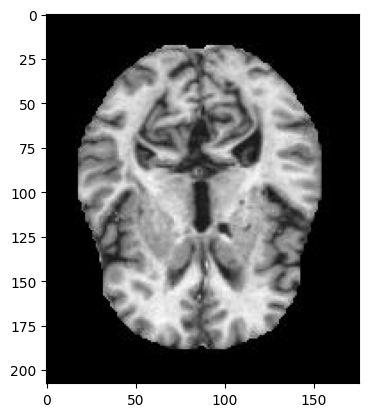

In [200]:
plt.imshow(img)
plt.show()

## Affine Transformations

### 1. Translation

Moves the image in x and y direction.

In [176]:
M_translate = np.float32([[1, 0, 50], [0, 1, 30]])  # Move 50 right, 30 down
translated = cv2.warpAffine(img, M_translate, (cols, rows))

### 2. Scaling
Resizes the image using a scaling factor.

In [179]:
scaled = cv2.resize(img, None, fx=1.2, fy=0.7)  # Scale 120% in width, 70% in height

### 3. Rotation
Rotates image around its center by a given angle and optional scale.

In [182]:
center = (cols / 2, rows / 2)
M_rotate = cv2.getRotationMatrix2D(center, angle=45, scale=1)
rotated = cv2.warpAffine(img, M_rotate, (cols, rows))

### 4. Shearing
Distorts the shape along x or y axis.

In [185]:
M_shear = np.float32([[1, 0.5, 0], [0.2, 1, 0]])
sheared = cv2.warpAffine(img, M_shear, (int(cols*1.5), int(rows*1.5)))

### 5. Combination
You can multiply transformation matrices to combine effects (e.g., rotation + translation):

In [188]:
M1 = cv2.getRotationMatrix2D(center, 30, 0.8)  # Rotation + scaling
M1[0, 2] += 40  # add translation x
M1[1, 2] += 30  # add translation y
combined = cv2.warpAffine(img, M1, (cols, rows))

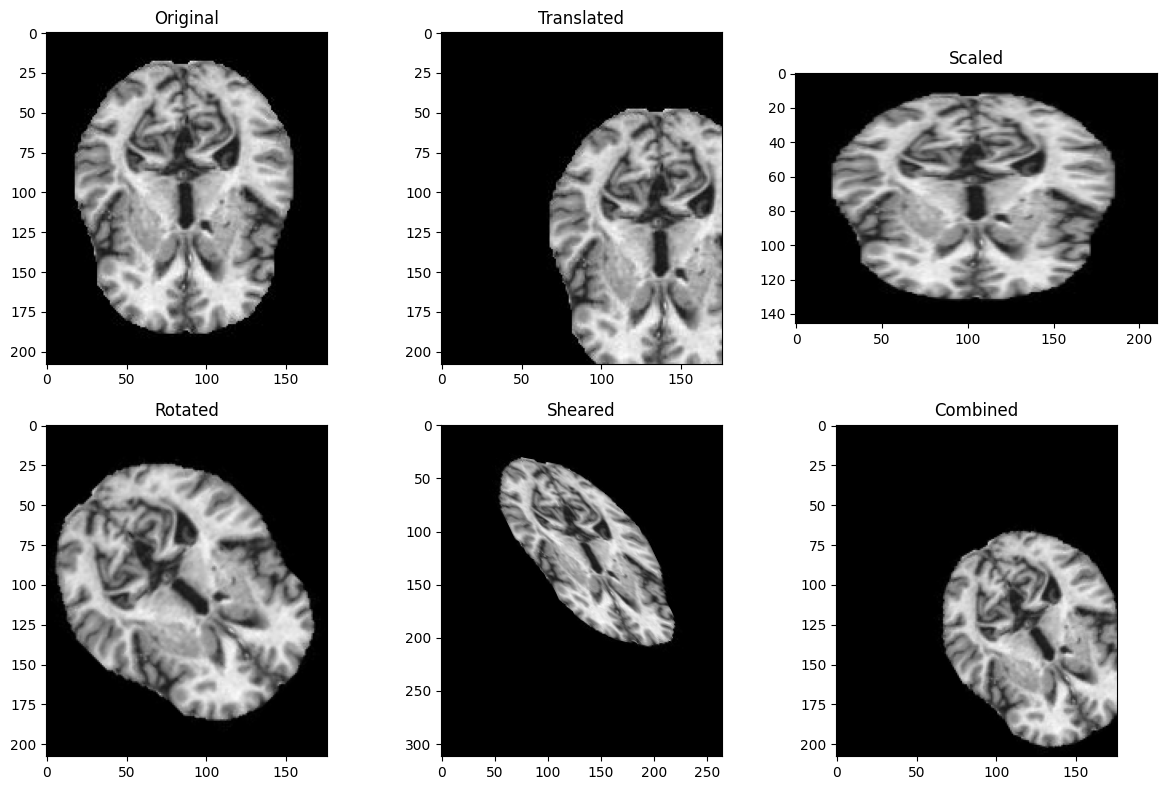

In [194]:
plt.figure(figsize=(12,8))
plt.subplot(231), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.subplot(232), plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB)), plt.title("Translated")
plt.subplot(233), plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)), plt.title("Scaled")
plt.subplot(234), plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)), plt.title("Rotated")
plt.subplot(235), plt.imshow(cv2.cvtColor(sheared, cv2.COLOR_BGR2RGB)), plt.title("Sheared")
plt.subplot(236), plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)), plt.title("Combined")
plt.tight_layout()
plt.show()

### Define Points

In [192]:
# Define four points in the source image (you can pick better ones)
pts_src = np.float32([[30, 30], [30, 170], [150, 30], [150, 170]])

These are 4 corner points from the original image that define a distorted or tilted region you want to correct.
Order:

1. Top-left
2. Bottom-left
3. Top-right
4. Bottom-right

In [ ]:
# Define destination points to get a straight rectangle
pts_dst = np.float32([[0, 0], [0, 200], [200, 0], [200, 200]])

These points define where you want your selected region to map to. Same order as source points

### Compute Homography and Apply Warp

In [160]:
# Compute the perspective transform matrix
H = cv2.getPerspectiveTransform(pts_src, pts_dst)

# Apply warp
warped_img = cv2.warpPerspective(img, H, (200, 200))

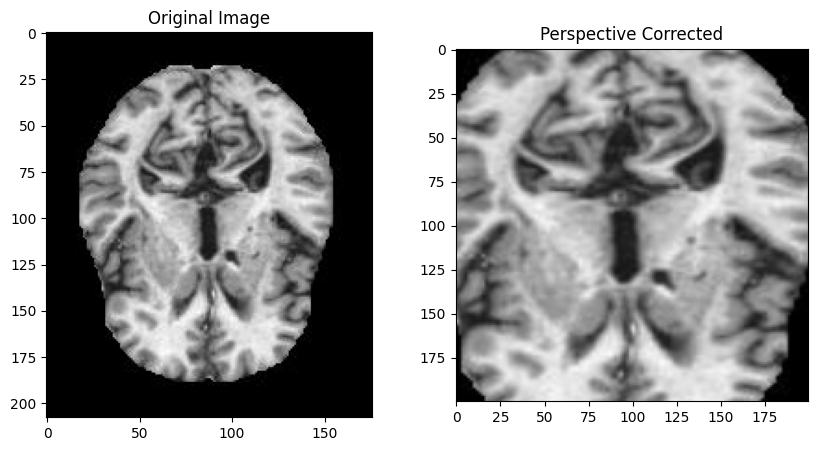

In [162]:
# Show images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(122), plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)), plt.title("Perspective Corrected")
plt.show()